# Dimensionality reduction ST data

# PCA

pip install scanpy

In [38]:
from sklearn.preprocessing import StandardScaler #for standardization
from sklearn.decomposition import PCA #for pca
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
# for ST data
import scanpy as sc
import cv2
# for kmeans clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Import visium data :

In [ ]:
PDAC_A1_visium = sc.read_visium("./visium/PDAC_A1/")
PDAC_B2_visium = sc.read_visium("./visium/PDAC_B2/")
PanCN_C3_visium = sc.read_visium("./visium/PanCN_C3/")
PanCN_D4_visium = sc.read_visium("./visium/PanCN_D4/")

In [14]:
counts = pd.read_csv("dataframe/DPLFC_151673_counts_with_probes.csv")
#counts = counts.set_index(["probes"])
counts

,Unnamed: 0,MIR1302-2HG,FAM138A,OR4F5,AL627309.1,AL627309.3,AL627309.2,AL627309.4,AL732372.1,OR4F29,...,AL354822.1,AC023491.2,AC004556.1,AC233755.2,AC233755.1,AC240274.1,AC213203.1,FAM231C,y_coord,x_coord
0,AAACAAGTATCTCCCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8468,9791
1,AAACAATCTACTAGCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2807,5769
2,AAACACCAATAACTGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9505,4068
3,AAACAGAGCGACTCCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4151,9271
4,AAACAGCTTTCAGAAG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7583,3393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3634,TTGTTTCACATCCAGG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9396,5653
3635,TTGTTTCATTAGTCTA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9630,4825
3636,TTGTTTCCATACAACT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7831,4631
3637,TTGTTTGTATTACACG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11193,5571


In [15]:
counts = counts.rename(columns={"Unnamed: 0": "probes"})
counts

,probes,MIR1302-2HG,FAM138A,OR4F5,AL627309.1,AL627309.3,AL627309.2,AL627309.4,AL732372.1,OR4F29,...,AL354822.1,AC023491.2,AC004556.1,AC233755.2,AC233755.1,AC240274.1,AC213203.1,FAM231C,y_coord,x_coord
0,AAACAAGTATCTCCCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8468,9791
1,AAACAATCTACTAGCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2807,5769
2,AAACACCAATAACTGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9505,4068
3,AAACAGAGCGACTCCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4151,9271
4,AAACAGCTTTCAGAAG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7583,3393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3634,TTGTTTCACATCCAGG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9396,5653
3635,TTGTTTCATTAGTCTA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9630,4825
3636,TTGTTTCCATACAACT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7831,4631
3637,TTGTTTGTATTACACG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11193,5571


In [18]:
counts_wo_coords = counts.drop(["x_coord", "y_coord"], axis = 1)

In [24]:
counts_wo_coords = counts_wo_coords.set_index("probes")

In [35]:
img = cv2.imread(f'visium/151673/spatial/151673.tif')

## PCA projection to 10D

In [20]:
def realize_pca(counts, nb_components):

    features = counts.columns
    #Standardize
    std_counts = StandardScaler().fit_transform(counts)
    #pca
    pca = PCA(n_components=nb_components)
    principalComponents = pca.fit_transform(std_counts)
    return (features, std_counts, pca, principalComponents)

In [25]:
features, std_counts, pca, principalComponents = realize_pca(counts_wo_coords, 10)

In [26]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2',
                          'principal component 3','principal component 4',
                          'principal component 5','principal component 6',
                          'principal component 7','principal component 8',
                          'principal component 9','principal component 10'])

In [27]:
principalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,45.341592,0.187323,5.858721,-10.332859,3.563249,6.620571,-1.075891,1.273821,-9.548616,0.243474
1,-30.582179,-6.787418,0.400028,0.961195,-0.458294,1.690031,0.853042,0.786760,-0.841280,1.251909
2,-15.545752,33.633481,-1.107917,0.824273,-3.467301,-1.083492,1.013742,0.179263,0.968442,0.674168
3,4.594759,-2.264015,6.114983,-5.202428,-0.022597,3.264965,-0.193892,0.328259,1.424797,2.896576
4,-2.457807,-0.945424,0.896113,2.664822,1.122282,-0.935366,-1.094456,-0.130613,-0.192985,2.323952
...,...,...,...,...,...,...,...,...,...,...
3634,-9.758980,48.593664,-4.039045,4.096268,-5.215320,-2.028295,2.454264,0.153292,-1.648270,0.033732
3635,-24.127971,17.013598,1.670822,-1.294868,-0.429541,3.146046,0.034256,0.611431,-2.001003,-0.085598
3636,-27.281272,-1.104438,0.597045,2.043755,-0.777374,-0.374306,0.582834,0.714537,-0.103007,0.635620
3637,-26.278018,5.356576,0.040218,1.202672,0.474452,-0.013831,0.732917,0.341686,0.445288,-0.788809


In [29]:
principalDf['x_coord'] = counts['x_coord']
principalDf['y_coord'] = counts['y_coord']

In [30]:
principalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,x_coord,y_coord
0,45.341592,0.187323,5.858721,-10.332859,3.563249,6.620571,-1.075891,1.273821,-9.548616,0.243474,9791,8468
1,-30.582179,-6.787418,0.400028,0.961195,-0.458294,1.690031,0.853042,0.786760,-0.841280,1.251909,5769,2807
2,-15.545752,33.633481,-1.107917,0.824273,-3.467301,-1.083492,1.013742,0.179263,0.968442,0.674168,4068,9505
3,4.594759,-2.264015,6.114983,-5.202428,-0.022597,3.264965,-0.193892,0.328259,1.424797,2.896576,9271,4151
4,-2.457807,-0.945424,0.896113,2.664822,1.122282,-0.935366,-1.094456,-0.130613,-0.192985,2.323952,3393,7583
...,...,...,...,...,...,...,...,...,...,...,...,...
3634,-9.758980,48.593664,-4.039045,4.096268,-5.215320,-2.028295,2.454264,0.153292,-1.648270,0.033732,5653,9396
3635,-24.127971,17.013598,1.670822,-1.294868,-0.429541,3.146046,0.034256,0.611431,-2.001003,-0.085598,4825,9630
3636,-27.281272,-1.104438,0.597045,2.043755,-0.777374,-0.374306,0.582834,0.714537,-0.103007,0.635620,4631,7831
3637,-26.278018,5.356576,0.040218,1.202672,0.474452,-0.013831,0.732917,0.341686,0.445288,-0.788809,5571,11193


## Kmeans

In [2]:
def perform_kmeans(counts, pca_counts, img):
    x = list(counts['x_coord'])
    y = list(counts['y_coord'])
    #standardize
    mms = StandardScaler()
    mms.fit(pca_counts)
    pca_counts_transformed = mms.transform(pca_counts)
    #kmeans
    kmeans = KMeans(n_clusters=7).fit(pca_counts_transformed)
    # centroids
    centroids = kmeans.cluster_centers_
    #plt
    plt.imshow(img)
    plt.scatter(x,y, s = 1, c=kmeans.labels_.astype(float))
    
    return(pca_counts_transformed, kmeans)



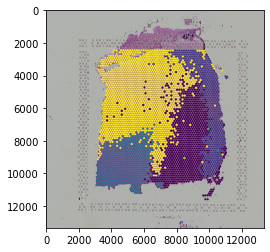

In [42]:
kmeans = perform_kmeans(counts, principalDf, img)

In [53]:
counts_cluster = counts.copy()
counts_cluster['cluster']=list(kmeans.labels_.astype(int))
counts_cluster

,probes,MIR1302-2HG,FAM138A,OR4F5,AL627309.1,AL627309.3,AL627309.2,AL627309.4,AL732372.1,OR4F29,...,AC023491.2,AC004556.1,AC233755.2,AC233755.1,AC240274.1,AC213203.1,FAM231C,y_coord,x_coord,cluster
0,AAACAAGTATCTCCCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8468,9791,1
1,AAACAATCTACTAGCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2807,5769,6
2,AAACACCAATAACTGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9505,4068,2
3,AAACAGAGCGACTCCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4151,9271,1
4,AAACAGCTTTCAGAAG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7583,3393,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3634,TTGTTTCACATCCAGG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9396,5653,2
3635,TTGTTTCATTAGTCTA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9630,4825,2
3636,TTGTTTCCATACAACT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7831,4631,6
3637,TTGTTTGTATTACACG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11193,5571,2


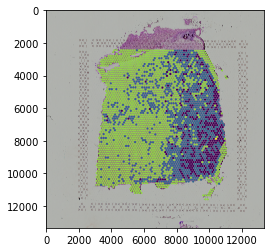

In [44]:
kmeans_2 = perform_kmeans(counts, counts_wo_coords, img)

In [50]:
ST_visium = sc.read_visium("./visium/151673/")


/opt/conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [58]:
counts_cluster = counts_cluster[["probes","cluster"]].copy()
counts_cluster = counts_cluster.set_index('probes')
counts_cluster

,cluster
probes,
AAACAAGTATCTCCCA-1,1
AAACAATCTACTAGCA-1,6
AAACACCAATAACTGC-1,2
AAACAGAGCGACTCCT-1,1
AAACAGCTTTCAGAAG-1,6
...,...
TTGTTTCACATCCAGG-1,2
TTGTTTCATTAGTCTA-1,2
TTGTTTCCATACAACT-1,6


In [59]:
ST_visium.obs['domain'] = counts_cluster
ST_visium.obs['domain']

AAACAAGTATCTCCCA-1    1
AAACAATCTACTAGCA-1    6
AAACACCAATAACTGC-1    2
AAACAGAGCGACTCCT-1    1
AAACAGCTTTCAGAAG-1    6
                     ..
TTGTTTCACATCCAGG-1    2
TTGTTTCATTAGTCTA-1    2
TTGTTTCCATACAACT-1    6
TTGTTTGTATTACACG-1    2
TTGTTTGTGTAAATTC-1    1
Name: domain, Length: 3639, dtype: int64

In [68]:
file_fold = "metadata_DPLFC"
dataset = '151673'

In [66]:
# add ground_truth
df_meta = pd.read_csv(file_fold + '/metadata.tsv', sep='\t')
df_meta_layer = df_meta['layer_guess']
ST_visium.obs['ground_truth'] = df_meta_layer.values

In [67]:
ST_visium = ST_visium[~pd.isnull(ST_visium.obs['ground_truth'])]
ST_visium = ST_visium[~pd.isnull(ST_visium.obs['domain'])]

In [70]:
from sklearn import metrics

In [71]:
ARI = metrics.adjusted_rand_score(ST_visium.obs['domain'], ST_visium.obs['ground_truth'])
ST_visium.uns['ARI'] = ARI

print('Dataset:', dataset)
print('ARI:', ARI)

Dataset: 151673
ARI: 0.17721255320634455


/tmp/ipykernel_664/2999003778.py:2: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  ST_visium.uns['ARI'] = ARI
/opt/conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


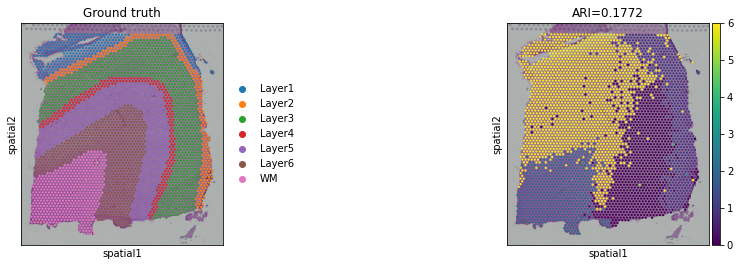

In [72]:
# plotting spatial clustering result
sc.pl.spatial(ST_visium,
              img_key="hires",
              color=["ground_truth", "domain"],
              title=["Ground truth", "ARI=%.4f"%ARI],
              show=True)

## PCA projection to 20D

In [ ]:
pca_20 = PCA(n_components=20)

In [ ]:
principalComponents_20 = pca_20.fit_transform(std_counts)

In [ ]:
principalDf_20 = pd.DataFrame(data = principalComponents_20)

In [ ]:
principalDf_20

## PCA projection to 95 percent of the variance

In [ ]:
pca_95 = PCA(.95)

In [ ]:
principalComponents_95 = pca_95.fit_transform(std_counts)

In [ ]:
principalDf_95 = pd.DataFrame(data = principalComponents_95)

In [ ]:
principalDf_95

## Explain variance

In [ ]:
pca.explained_variance_ratio_

In [ ]:
pca_20.explained_variance_ratio_

In [ ]:
pca_95.explained_variance_ratio_

In [ ]:
pca_95.n_components_

In [ ]:
pc1 = std_counts @ pca_95.components[0,:]

In [ ]:
pca_95.explained_variance_ratio_

In [ ]:
import plotly.express as px

In [ ]:
for variance in np.arange(.1, 1, .05):
    pca = PCA(variance)
    principalComponents = pca.fit_transform(std_counts)
    print(f'For {variance} percent of the variance retained, the number of principal component to keep is :{pca.n_components_}')

# NMF

In [ ]:
from sklearn.decomposition import NMF

In [ ]:
from sklearn import decomposition, datasets, model_selection, preprocessing, metrics

In [ ]:
scaler = preprocessing.StandardScaler(with_mean=False).fit(counts)

In [ ]:
scaler_transform = scaler.transform(counts)

In [ ]:
nmf = decomposition.NMF(n_components=100).fit(scaler_transform)

In [ ]:
nmf

In [ ]:
def get_score(model, data, scorer=metrics.explained_variance_score):
    """ Estimate performance of the model on the data """
    prediction = model.inverse_transform(model.transform(data))
    return scorer(data, prediction)


In [ ]:
ks = range(1,100,10)
#perfs = []
for k in ks:
    nmf = decomposition.NMF(n_components=k).fit(scaler_transform)
    perfs = get_score(nmf, scaler_transform)
    print(f"component = {k}, total variance explain ={perfs}")

In [ ]:
print(get_score(nmf, scaler_transform))

In [ ]:
model = NMF(n_components=10, init='random', random_state=0)

In [ ]:
W = model.fit_transform(counts)

In [ ]:
H = model.components_

In [ ]:
W

# AutoEncoders

https://www.analyticsvidhya.com/blog/2021/06/dimensionality-reduction-using-autoencoders-in-python/

In [ ]:
pip install tensorflow

In [ ]:
import math
import pandas as pd
import tensorflow as tf
import kerastuner.tuners as kt
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
# for scaling
from sklearn.preprocessing import MinMaxScaler

In [ ]:
counts = pd.read_csv("autoencoder/counts_with_probes.csv")

## Scale the data between 0 and 1

We are going to use sigmoid activation function in the output layer which outputs values between 0 and 1 (->MinMaxScale) 

In [ ]:
def scale_datasets(x_train):
    """
    Standard Scale test and train data
    """
    standard_scaler = MinMaxScaler()
    x_train_scaled = pd.DataFrame(standard_scaler.fit_transform(x_train),columns=x_train.columns)
    return(x_train_scaled)

In [26]:
class AutoEncoders(Model):

  def __init__(self, output_units):

    super().__init__()
    self.encoder = Sequential(
        [
          Dense(32, activation="relu"),
          Dense(16, activation="relu"),
          Dense(7, activation="relu")
        ]
    )

    self.decoder = Sequential(
        [
          Dense(16, activation="relu"),
          Dense(32, activation="relu"),
          Dense(output_units, activation="sigmoid")
        ]
    )

def call(self, inputs):
    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded
  
auto_encoder = AutoEncoders(len(x_train_scaled.columns))

auto_encoder.compile(
    loss='mae',
    metrics=['mae'],
    optimizer='adam'
)

history = auto_encoder.fit(
    x_train_scaled, 
    x_train_scaled, 
    epochs=15, 
    batch_size=32, 
    validation_data=(x_test_scaled, x_test_scaled)
)

NameError: name 'Model' is not defined

In [60]:
counts.to_csv("/sbgenomics/oupfiles/counts_PDAC_B2_with_probes.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/sbgenomics/files/counts_PDAC_B2_with_probes.csv'

In [ ]:
(f"/sbgenomics/output-files/data/counts_PDAC_B2_with_probes.csv"", selection)